Я посмотрю всякие "есть ли разница", а потом на основе этого можно сделать дамми-переменные на основые параметры, и попробовать поискать группы с помощью машинного обучения

In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px

In [46]:
mambaall = pd.read_csv('mamba.csv')
mambaw = pd.read_csv('womendf.csv')
mamba = pd.concat([mambaall, mambaw])
display(mamba.shape)
mamba.head()

(330431, 21)

,about,age,aim,children,city,edu,gender,height,intrestedin,language,...,partnerage,photocount,smoke,weight,id,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1
0,NaN,40.0,NaN,NaN,Чиребон,NaN,Мужчины,NaN,девушка,NaN,...,37 - 41,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,41.0,NaN,NaN,NaN,NaN,Мужчины,NaN,девушка,English,...,38 - 42,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,30.0,"встреча, свидание",NaN,Долгопрудный,NaN,Мужчины,NaN,девушка,Русский,...,27 - 44,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,29.0,NaN,NaN,Москва,NaN,Мужчины,NaN,девушка,Русский,...,26 - 30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,50.0,NaN,NaN,Алмере,NaN,Женщины,NaN,парень,Русский,...,46 - 50,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
mamba.drop(labels=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1'], axis=1, inplace=True)
mamba.head()

,about,age,aim,children,city,edu,gender,height,intrestedin,language,live,partnerage,photocount,smoke,weight,id
0,NaN,40.0,NaN,NaN,Чиребон,NaN,Мужчины,NaN,девушка,NaN,NaN,37 - 41,0.0,NaN,NaN,NaN
1,NaN,41.0,NaN,NaN,NaN,NaN,Мужчины,NaN,девушка,English,NaN,38 - 42,0.0,NaN,NaN,NaN
2,NaN,30.0,"встреча, свидание",NaN,Долгопрудный,NaN,Мужчины,NaN,девушка,Русский,NaN,27 - 44,0.0,NaN,NaN,NaN
3,NaN,29.0,NaN,NaN,Москва,NaN,Мужчины,NaN,девушка,Русский,NaN,26 - 30,0.0,NaN,NaN,NaN
4,NaN,50.0,NaN,NaN,Алмере,NaN,Женщины,NaN,парень,Русский,NaN,46 - 50,0.0,NaN,NaN,NaN


In [48]:
index_drop = mamba.loc[mamba.duplicated() == True].index
mamba = mamba.drop(index=index_drop)
mamba.shape

(320755, 16)

In [49]:
mamba.isna().mean()

about          0.927540
age            0.000000
aim            0.416308
children       0.741893
city           0.030983
edu            0.748525
gender         0.007526
height         0.697604
intrestedin    0.000000
language       0.045973
live           0.807130
partnerage     0.003242
photocount     0.000000
smoke          0.755196
weight         0.771180
id             0.005238
dtype: float64

<b>Я буду сравнивать, скорее всего, мужчин и женщин </b>
<br> Надо добрать женщин 

In [50]:
mamba.groupby('gender')['age'].count().reset_index()

,gender,age
0,Женщины,138683
1,Мужчины,179658


In [51]:
import random
men = mamba.loc[mamba['gender'] == 'Мужчины']
women = mamba.loc[mamba['gender'] == 'Женщины']
menLess = random.sample(list(men.index), 140000)
men_chosen = men.loc[men.index.isin(menLess)]
display(men_chosen.shape)
mamba = pd.concat([women, men_chosen])
mamba.groupby('gender')['age'].count().reset_index()

(140000, 16)

,gender,age
0,Женщины,138683
1,Мужчины,140000


In [58]:
mamba['count'] = 1

<b> Убираю выбросы по возрастам.</b>
<br> Далее я посмотрю возраста и оставлю только тех пользователей, возраста которых не попадают в диапазон выбросов, плюс уберу всех пользователей, моложе 18 лет.  

In [59]:
ages_men = mamba.loc[mamba.gender == 'Мужчины'].groupby('age')['count'].count().reset_index()
ages_women = mamba.loc[mamba.gender == 'Женщины'].groupby('age')['count'].count().reset_index()

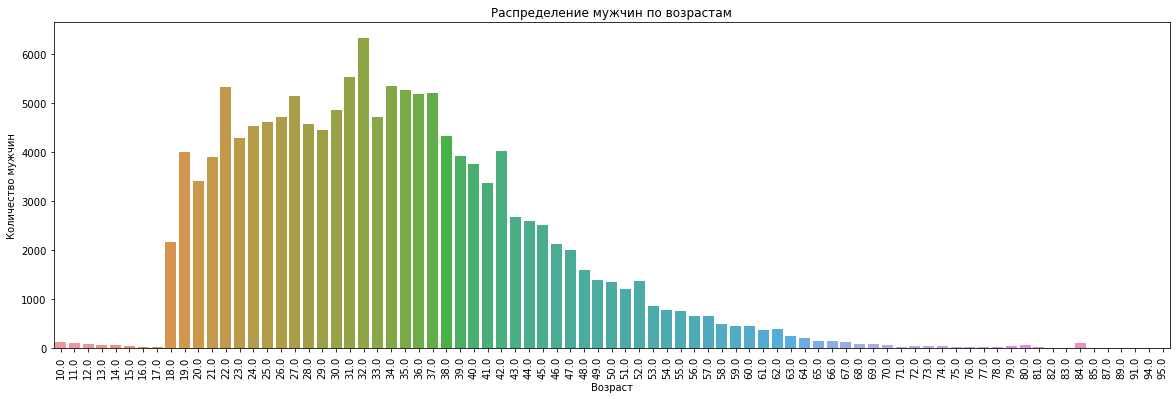

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20, 6))
sns.barplot(data=ages_men, y='count', x='age')
ax.set_title('Распределение мужчин по возрастам')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество мужчин')
plt.xticks(rotation=90)
plt.show()

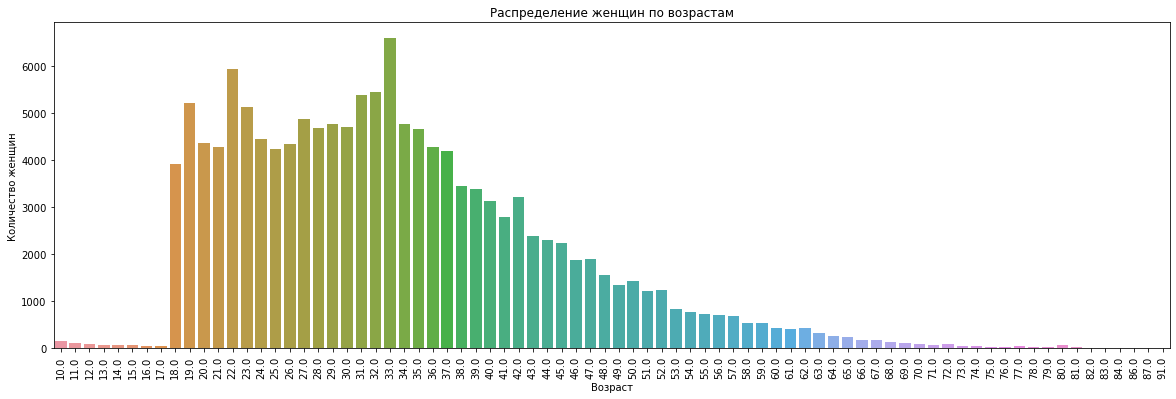

In [61]:
fig, ax = plt.subplots(figsize = (20, 6))
sns.barplot(data=ages_women, y='count', x='age')
ax.set_title('Распределение женщин по возрастам')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество женщин')
plt.xticks(rotation=90)
plt.show()

In [62]:
m_q75 = mamba.loc[mamba.gender == 'Мужчины', 'age'].quantile(0.75)
m_q25 = mamba.loc[mamba.gender == 'Мужчины', 'age'].quantile(0.25)
m_iqr = m_q75 - m_q25 
m_age_border2 = m_q75 + (m_iqr*1.5)
noutMen = mamba.loc[(mamba['age'] < m_age_border2) & (mamba['age'] > 17) & (mamba['gender'] == 'Мужчины')]
outMen = mamba.loc[(mamba['age'] > m_age_border2) & (mamba['age'] < 17) & (mamba['gender'] == 'Мужчины')] 

w_q75 = mamba.loc[mamba.gender == 'Женщины', 'age'].quantile(0.75)
w_q25 = mamba.loc[mamba.gender == 'Женщины', 'age'].quantile(0.25)
w_iqr = w_q75 - w_q25 
w_age_border2 = w_q75 + (w_iqr*1.5)
noutWomen = mamba.loc[(mamba['age'] < w_age_border2) & (mamba['age'] > 17) & (mamba['gender'] == 'Женщины')]
outWomen = mamba.loc[(mamba['age'] > w_age_border2) & (mamba['age'] < 17) & (mamba['gender'] == 'Женщины')] 

In [63]:
mambaNout = pd.concat([noutWomen, noutMen])
mambaNout.to_csv('mambaNout.csv', index=False)

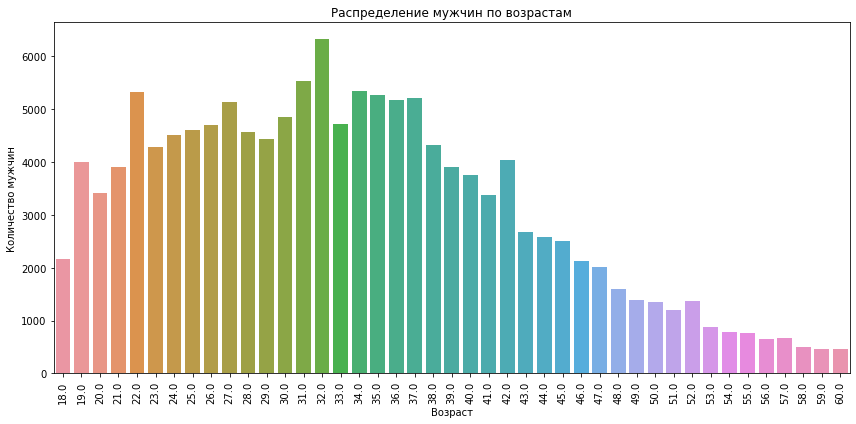

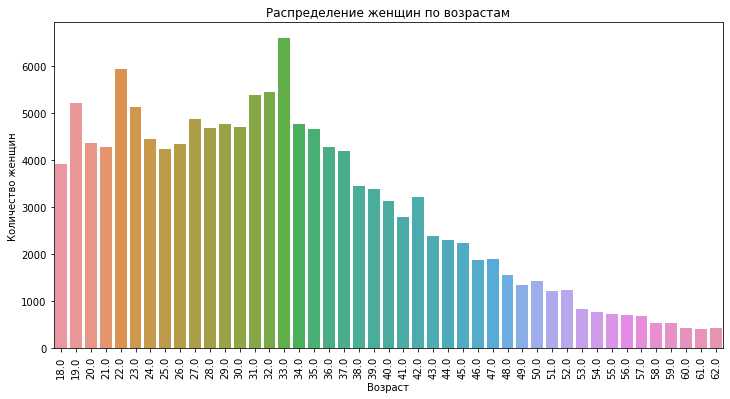

In [71]:
ages_men_nout = noutMen.loc[noutMen.gender == 'Мужчины'].groupby('age')['count'].count().reset_index()
ages_women_nout = noutWomen.loc[noutWomen.gender == 'Женщины'].groupby('age')['count'].count().reset_index()

fig, ax = plt.subplots(figsize = (12, 6), tight_layout=True, facecolor=(1, 1, 1))
sns.barplot(data=ages_men_nout, y='count', x='age')
ax.set_title('Распределение мужчин по возрастам')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество мужчин')
plt.xticks(rotation=90)

fig.savefig('ages_men.png')

fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(data=ages_women_nout, y='count', x='age')
ax.set_title('Распределение женщин по возрастам')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество женщин')
plt.xticks(rotation=90)
plt.show()

fig.savefig('ages_women.png')

In [65]:
post = go.Figure()
genders = ['Мужчины', 'Женщины']
for gen in genders: 
    visible = False 
    if gen == 'Мужчины':
        visible = True
    data = mambaNout.loc[mambaNout.gender == gen].groupby('age')['count'].count().reset_index()
    post.add_trace(
        go.Bar(x=data['age'], y=data['count'], visible = visible, name = gen, marker_color='purple'
        )
    )
    
steps = []
for i in range(len(genders)):
    to_add = []
    for j in range(len(genders)): 
        if i == j:
            to_add.append(True)
        else:
            to_add.append(False)
    a_step = dict(
        method='update',
        args = [
            {'visible' : to_add}, 
            {'title.text' : 'Количество людей по возрастам на Mamba ' + genders[i]}
        ], 
        label = genders[i]
    )
    steps.append(a_step)

post.update_layout(
    sliders=[dict(
        steps=steps
    )]
)

post.update_layout(title='Количество людей по возрастам на Mamba')

post.show()

### Уберу хвосты в возрастах и положу их в отдельный датасет

In [72]:
mamba_age45 = mambaNout.loc[(mambaNout['age'] >=18) & (mambaNout['age'] <=45)]
mamba1845 = mambaNout.loc[(mambaNout['age'] < 18) & (mambaNout['age'] >45)]
mamba_age45.to_csv('mambaNot18-45.csv', index=False)
mamba1845.to_csv('mambaLess18More45.csv', index=False)


In [73]:
post = go.Figure()
genders = ['Мужчины', 'Женщины']
for gen in genders: 
    visible = False 
    if gen == 'Мужчины':
        visible = True
    data = mamba_age45.loc[mamba_age45.gender == gen].groupby('age')['count'].count().reset_index()
    post.add_trace(
        go.Bar(x=data['age'], y=data['count'], visible = visible, name = gen, marker_color='purple'
        )
    )
    
steps = []
for i in range(len(genders)):
    to_add = []
    for j in range(len(genders)): 
        if i == j:
            to_add.append(True)
        else:
            to_add.append(False)
    a_step = dict(
        method='update',
        args = [
            {'visible' : to_add}, 
            {'title.text' : 'Количество людей по возрастам на Mamba ' + genders[i]}
        ], 
        label = genders[i]
    )
    steps.append(a_step)

post.update_layout(
    sliders=[dict(
        steps=steps
    )]
)

post.update_layout(title='Количество людей по возрастам на Mamba')

post.show()

#### Добавлю вспомогательные столбцы

In [16]:
mambadf = pd.read_csv('mambaNot18-45.csv')
display(mambadf.columns)
mambadf.head(3)

Index(['about', 'age', 'aim', 'children', 'city', 'edu', 'gender', 'height',
       'intrestedin', 'language', 'live', 'partnerage', 'photocount', 'smoke',
       'weight', 'id', 'count'],
      dtype='object')

,about,age,aim,children,city,edu,gender,height,intrestedin,language,live,partnerage,photocount,smoke,weight,id,count
0,NaN,41.0,NaN,NaN,Старобельск,NaN,Женщины,165.0,парень,"Русский, Укра",NaN,25 - 40,0.0,Курю,65.0,NaN,1
1,NaN,36.0,NaN,NaN,Краснодар,NaN,Женщины,NaN,парень,Русский,NaN,33 - 37,0.0,NaN,NaN,NaN,1
2,"Не ищу приключений.\nНе ищу спонсоров, альфонс...",39.0,"переписка, флирт, дружба, общение, отношения, ...",Детей нет,Дюссельдорф,NaN,Женщины,167.0,парень,Deutsch,Отдельная квартира,36 - 40,0.0,Не курю,NaN,NaN,1


In [17]:
#Функция считает диапазон возраста партнера

def get_partnerage(agik):
    agik = str(agik)
    start_age = agik[:2]
    end_age = agik[-2:]
    return start_age, end_age 

par_ages = pd.Series(np.array(mambadf.partnerage))
mambadf['range_partner_age'] = par_ages.apply(get_partnerage)

In [18]:
#функция считает диапазон возраста партнера, который указывает владелец анкеты 

def partner_age_range(agik):
    try:
        end_age = agik[1]
        start_age = agik[0]
        rangeAge = int(end_age) - int(start_age)
    except:
        rangeAge = np.nan
    return rangeAge

age_range = pd.Series(np.array(mambadf.range_partner_age))
mambadf['rangeAge'] = age_range.apply(partner_age_range) 

In [19]:
mambadf.aim.value_counts()[:40]

отношения                                                                           43225
встреча, свидание                                                                   25850
флирт                                                                               19086
флирт, отношения, встреча, свидание                                                  3039
дружба, общение                                                                      2728
флирт, встреча, свидание                                                             2198
переписка, дружба, общение                                                           1924
переписка, флирт, дружба, общение, отношения, встреча, свидание                      1766
отношения, встреча, свидание                                                         1636
брак, создание семьи, отношения                                                      1605
дружба, общение, отношения                                                           1124
дружба, об

In [20]:
#цели слишком разнородны, поэтому "сожму" эту разнородность до 5 устойчивых целей

def determine_aim(aims): 
    try: 
        if len(aims.split(',')) > 3 or len(aims.split(' ')) > 3:
            return 'unsure'
        elif 'брак' in aims or 'создание семьи' in aims: 
            return 'family-person'
        elif aims == 'отношения':
            return 'relationships'
        elif 'флирт' in aims or'свидание' in aims or'встреча' in aims: 
            return 'casual'
        elif 'дружба' in aims or 'общение' in aims or 'переписка' in aims:
            return 'friendy'
        else:
            return aims
    except:
        return 'failed'
    
all_aims = pd.Series(np.array(mambadf.aim))
all_aims = all_aims.fillna('unknown')
mambadf['simpleaim'] = all_aims.apply(determine_aim)

In [21]:
#добавлю столбец, где показано, сколько в процентах от общего числа приходится на 1 женщину и 1 мужчину для будущих расчетов

mambadf['percent'] = 0.01
mambadf.loc[mambadf.gender == 'Женщины', 'percent'] = 100 / mambadf.gender.value_counts()['Женщины']
mambadf.loc[mambadf.gender == 'Мужчины', 'percent'] = 100 / mambadf.gender.value_counts()['Мужчины']

In [22]:
#добавляю младший возраст диапазона у тех, кого ищут

def get_start_age(agik):
    try:
        start_age = int(agik[0]) #because in a column there is tuple in a string and in tuple are string too
    except:
        start_age = np.nan
    return start_age

age_range = pd.Series(np.array(mambadf.range_partner_age))
mambadf['start_age'] = age_range.apply(get_start_age)

In [23]:
display(mambadf.columns)
mambadf.head(10)

Index(['about', 'age', 'aim', 'children', 'city', 'edu', 'gender', 'height',
       'intrestedin', 'language', 'live', 'partnerage', 'photocount', 'smoke',
       'weight', 'id', 'count', 'range_partner_age', 'rangeAge', 'simpleaim',
       'percent', 'start_age'],
      dtype='object')

,about,age,aim,children,city,edu,gender,height,intrestedin,language,...,photocount,smoke,weight,id,count,range_partner_age,rangeAge,simpleaim,percent,start_age
0,NaN,41.0,NaN,NaN,Старобельск,NaN,Женщины,165.0,парень,"Русский, Укра",...,0.0,Курю,65.0,NaN,1,"(25, 40)",15.0,unknown,0.000839,25.0
1,NaN,36.0,NaN,NaN,Краснодар,NaN,Женщины,NaN,парень,Русский,...,0.0,NaN,NaN,NaN,1,"(33, 37)",4.0,unknown,0.000839,33.0
2,"Не ищу приключений.\nНе ищу спонсоров, альфонс...",39.0,"переписка, флирт, дружба, общение, отношения, ...",Детей нет,Дюссельдорф,NaN,Женщины,167.0,парень,Deutsch,...,0.0,Не курю,NaN,NaN,1,"(36, 40)",4.0,unsure,0.000839,36.0
3,NaN,28.0,"брак, создание семьи, дружба, общение, отношения",NaN,Кременчуг,NaN,Женщины,163.0,парень,Русский,...,0.0,NaN,85.0,NaN,1,"(25, 31)",6.0,unsure,0.000839,25.0
4,NaN,44.0,"встреча, свидание",NaN,Донецк,NaN,Женщины,NaN,парень,Русский,...,0.0,NaN,NaN,NaN,1,"(41, 45)",4.0,casual,0.000839,41.0
5,Я МАМА,24.0,"дружба, общение","Дети есть, живем вместе",Кременчуг,Среднее,Женщины,NaN,парень,Русский,...,0.0,Курю,NaN,NaN,1,"(24, 27)",3.0,friendy,0.000839,24.0
6,NaN,26.0,"переписка, дружба, общение","Дети есть, живем вместе",Херсон,Среднее,Женщины,158.0,парень,Русский,...,0.0,Курю,NaN,NaN,1,"(23, 27)",4.0,friendy,0.000839,23.0
7,NaN,23.0,отношения,Детей нет,Волжский,Высшее,Женщины,171.0,парень,"English, Fran",...,0.0,Не курю,NaN,NaN,1,"(20, 24)",4.0,relationships,0.000839,20.0
8,NaN,45.0,"переписка, дружба, общение, отношения","Дети есть, живем вместе",Бабаево,Высшее,Женщины,158.0,парень,Русский,...,0.0,Не курю,75.0,NaN,1,"(42, 46)",4.0,unsure,0.000839,42.0
9,"Познавая любовь, мы рисуем познать боль разоча...",26.0,"флирт, отношениямузыкаспортфутбол",Детей нет,Запорожье,Высшее,Женщины,170.0,девушка,Русский,...,0.0,NaN,46.0,NaN,1,"(23, 30)",7.0,casual,0.000839,23.0


#### И запишу датафрейм с новыми столбцами

In [24]:
mambadf.to_csv('mamba18-45newColumns.csv', index=False)

In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px

mambadf = pd.read_csv('mamba18-45newColumns.csv')
mambadf.head(3)

,about,age,aim,children,city,edu,gender,height,intrestedin,language,...,photocount,smoke,weight,id,count,range_partner_age,rangeAge,simpleaim,percent,start_age
0,NaN,41.0,NaN,NaN,Старобельск,NaN,Женщины,165.0,парень,"Русский, Укра",...,0.0,Курю,65.0,NaN,1,"('25', '40')",15.0,unknown,0.000839,25.0
1,NaN,36.0,NaN,NaN,Краснодар,NaN,Женщины,NaN,парень,Русский,...,0.0,NaN,NaN,NaN,1,"('33', '37')",4.0,unknown,0.000839,33.0
2,"Не ищу приключений.\nНе ищу спонсоров, альфонс...",39.0,"переписка, флирт, дружба, общение, отношения, ...",Детей нет,Дюссельдорф,NaN,Женщины,167.0,парень,Deutsch,...,0.0,Не курю,NaN,NaN,1,"('36', '40')",4.0,unsure,0.000839,36.0


In [75]:
mambadf.describe()

,age,height,photocount,weight,id,count,rangeAge,percent,start_age
count,239987.000000,70751.000000,239987.000000,52288.000000,2.387810e+05,239987.0,239253.000000,239987.000000,239253.000000
mean,30.677870,172.113737,0.500327,69.884237,1.795171e+09,1.0,7.802460,0.000833,27.377003
std,7.400027,9.245611,1.208410,15.436486,3.620405e+06,0.0,9.281938,0.000005,7.271670
min,18.000000,150.000000,0.000000,40.000000,1.790103e+09,1.0,1.000000,0.000828,18.000000
25%,24.000000,165.000000,0.000000,58.000000,1.791374e+09,1.0,4.000000,0.000828,20.000000
50%,31.000000,172.000000,0.000000,70.000000,1.795514e+09,1.0,4.000000,0.000828,27.000000
75%,36.000000,178.000000,0.000000,80.000000,1.798170e+09,1.0,7.000000,0.000839,33.000000
max,45.000000,220.000000,16.000000,160.000000,1.800291e+09,1.0,62.000000,0.000839,79.000000


In [76]:
mambadf.groupby('gender')['count'].sum()

gender
Женщины    119222
Мужчины    120765
Name: count, dtype: int64

Ну вот, теперь мужчин и женщин примерно одинаково
### Теперь посмотрю, есть ли зависимости в возрастах между тем, кто ищет и кого ищут
очень логичная корреляция: люди более старшего возраста подавляюще часто ищут тоже более старших людей

In [77]:
corr_ages = pd.DataFrame({'search' : mambadf['age'], 'to_search_for' : mambadf['start_age']})
corr_ages.corr()

,search,to_search_for
search,1.000000,0.831896
to_search_for,0.831896,1.000000


### Дальше гляжу типы отношений, кому что надо в зависимости от пола и возраста


In [78]:
genders_aims = mambadf.groupby(['gender','simpleaim'])[['percent', 'count']].sum().reset_index().sort_values(by='percent', ascending=False)
genders_aims = genders_aims.loc[genders_aims['percent'] > 0.1]
genders_aims

,gender,simpleaim,percent,count
4,Женщины,unknown,45.067186,53730
642,Мужчины,unknown,38.769511,46820
638,Мужчины,casual,25.929698,31314
3,Женщины,relationships,18.530137,22092
641,Мужчины,relationships,17.499275,21133
0,Женщины,casual,16.982604,20247
643,Мужчины,unsure,15.413406,18614
5,Женщины,unsure,14.169365,16893
2,Женщины,friendy,4.097398,4885
640,Мужчины,friendy,1.510371,1824


In [83]:
fig = px.bar(genders_aims, x="simpleaim", y="percent",
             color='gender', barmode='group', title='Distribution of aims among women and men',
             color_discrete_map={'Мужчины': 'lightblue', 'Женщины': 'lightpink'}, 
             labels={'simpleaim': 'Aim', 'percent':'Percent of a sample'})
fig.show()

In [84]:
aims_count = pd.pivot_table(data=genders_aims, columns='simpleaim', index='gender', values='count')
aims_count['total'] = aims_count.sum(axis=1).values

dictaim = {}
for aim, count in zip(list(aims_count.columns), list(aims_count.sum())):
    dictaim[aim] = count
    
aims_count = aims_count.append(dictaim, ignore_index=True)
aims_count['index'] = ['women', 'men', 'all']
aims_count

,casual,family-person,friendy,relationships,unknown,unsure,total,index
0,20247,577,4885,22092,53730,16893,118424,women
1,31314,483,1824,21133,46820,18614,120188,men
2,51561,1060,6709,43225,100550,35507,238612,all


In [85]:
expected_values = np.outer(aims_count['total'][0:2], aims_count.loc[aims_count['index'] == 'all', 
                                                                    ['casual', 'family-person', 'friendy', 'relationships', 'unknown', 'unsure']])/238612
observed = aims_count.iloc[0:2, 0:6]

In [86]:
((observed-expected_values)**2/expected_values).sum().sum()

4347.0934220318195

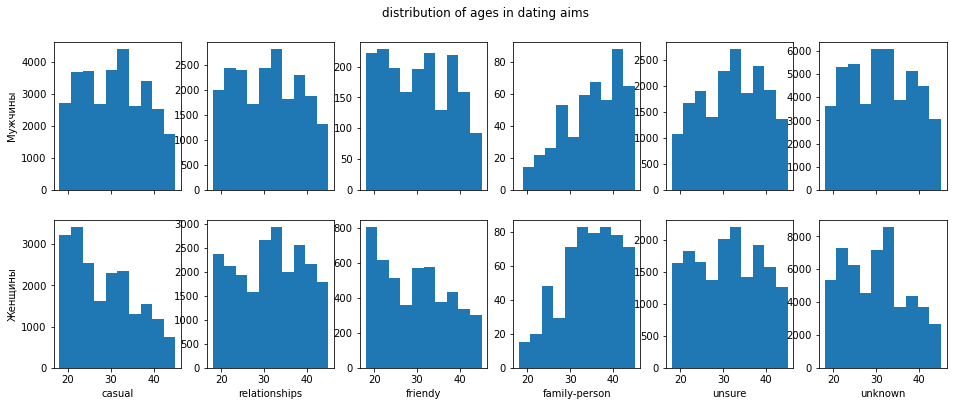

In [87]:
fig, axs = plt.subplots(figsize=(16, 6), nrows=2, ncols=6, sharey=False, sharex=True)

for ax1, gen in enumerate(['Мужчины', 'Женщины']): 
    for ax2, aim in enumerate(['casual', 'relationships', 'friendy', 'family-person', 'unsure', 'unknown']): 
        data = mambadf.loc[(mambadf['gender'] == gen) & (mambadf['simpleaim'] == aim)]['age']
        ax = axs[ax1][ax2] #this is the instance of the axs class (one plot)
        ax.hist(data)
   
        if ax2 == 0:
            ax.set_ylabel(gen)
 
        if ax1 == 1: 
            ax.set_xlabel(aim) 
        
fig.suptitle("distribution of ages in dating aims", y=0.96) 

plt.savefig('aim_age_gender_dist.png')

In [88]:
from scipy.stats import skew
print('Коэффициенты ассиметрии в данных')
for gen in ['Мужчины', 'Женщины']: 
    for aim in ['casual', 'relationships', 'friendy', 'family-person', 'unsure', 'unknown']: 
        data = mambadf.loc[(mambadf['gender'] == gen) & (mambadf['simpleaim'] == aim)]['age']
        skew1 = skew(data) 
        if skew1 < 0.5 and skew1 > -0.5:
            simetry = ' simetrical'
        else:
            simetry = ' not simetrical'
        print(gen, aim + '= ' + str(skew1) + simetry)

Коэффициенты ассиметрии в данных
Мужчины casual= 0.0912996192028004 simetrical
Мужчины relationships= 0.056028668813815026 simetrical
Мужчины friendy= 0.10358849575301493 simetrical
Мужчины family-person= -0.437225818017187 simetrical
Мужчины unsure= -0.11019061768856385 simetrical
Мужчины unknown= 0.04728352635583831 simetrical
Женщины casual= 0.3945912528244827 simetrical
Женщины relationships= -0.08176519733471514 simetrical
Женщины friendy= 0.21883354476410555 simetrical
Женщины family-person= -0.3850568026532787 simetrical
Женщины unsure= -0.003097769466883075 simetrical
Женщины unknown= 0.1941973913088004 simetrical


In [89]:
from scipy.stats import kurtosis
print('Коэффициенты распределенности в группах')
for gen in ['Мужчины', 'Женщины']: 
    for aim in ['casual', 'relationships', 'friendy', 'family-person', 'unsure', 'unknown']: 
        data = mambadf.loc[(mambadf['gender'] == gen) & (mambadf['simpleaim'] == aim)]['age']
        skew1 = kurtosis(data) 
        if skew1 > 0.7:
            simetry = ' too peaked'
        elif skew1 < -0.7:
            simetry = ' too flat'
        else:
            simetry = ' moderately normal'
        print(gen, aim + '= ' + str(skew1) + simetry)

Коэффициенты распределенности в группах
Мужчины casual= -0.9914653650791005 too flat
Мужчины relationships= -1.0511594931800443 too flat
Мужчины friendy= -1.1297156930863375 too flat
Мужчины family-person= -0.8004287614390124 too flat
Мужчины unsure= -0.947887100352387 too flat
Мужчины unknown= -1.0289686495843213 too flat
Женщины casual= -0.9084437342937419 too flat
Женщины relationships= -1.0537513043410298 too flat
Женщины friendy= -1.0687844187168007 too flat
Женщины family-person= -0.5855359237610935 moderately normal
Женщины unsure= -1.0595640051279969 too flat
Женщины unknown= -0.8791107224244703 too flat


In [90]:
from scipy.stats import ttest_ind
for aim in ['casual', 'relationships', 'friendy', 'family-person', 'unsure', 'unknown']:
    datamen = mambadf.loc[(mambadf['gender'] == 'Мужчины') & (mambadf['simpleaim'] == aim)]['age']
    datawomen = mambadf.loc[(mambadf['gender'] == 'Женщины') & (mambadf['simpleaim'] == aim)]['age']
    print(aim, ttest_ind(datamen, datawomen))
    print('mean for men: ', np.mean(datamen), 'mean for women: ', np.mean(datawomen))

casual Ttest_indResult(statistic=33.244374696449334, pvalue=8.546000331906937e-240)
mean for men:  30.7031040429201 mean for women:  28.516027065738133
relationships Ttest_indResult(statistic=-7.939323179687635, pvalue=2.0815910298532346e-15)
mean for men:  30.866890644962854 mean for women:  31.4448216548977
friendy Ttest_indResult(statistic=3.3425683274888685, pvalue=0.0008346128376344849)
mean for men:  30.28892543859649 mean for women:  29.57871033776868
family-person Ttest_indResult(statistic=1.4095475928723162, pvalue=0.15896717927263332)
mean for men:  35.0 mean for women:  34.4263431542461
unsure Ttest_indResult(statistic=11.778254218771881, pvalue=5.795371905773976e-32)
mean for men:  32.136295261631034 mean for women:  31.21819688628426
unknown Ttest_indResult(statistic=24.92998706372192, pvalue=9.189945528911769e-137)
mean for men:  31.15333190944041 mean for women:  30.012283640424343


<ipython-input-91-44b0929acff2>:8: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



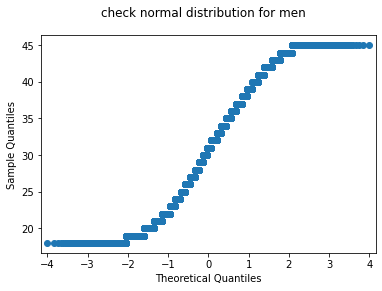

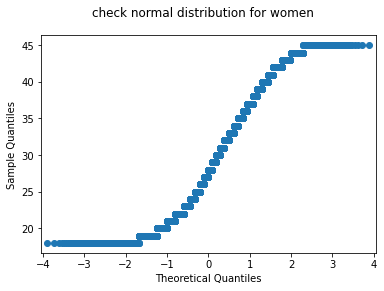

In [91]:
#проверила по qq-plot, что действительно лучше т-тест, видно, что распределение нормальное, но сплющенное

import statsmodels.api as sm
figmen = sm.qqplot(mambadf.loc[(mambadf['gender'] == 'Мужчины') & (mambadf['simpleaim'] == 'casual')]['age'])
figwomen = sm.qqplot(mambadf.loc[(mambadf['gender'] == 'Женщины') & (mambadf['simpleaim'] == 'casual')]['age'])
figmen.suptitle('check normal distribution for men' )
figwomen.suptitle('check normal distribution for women')
fig.show()

#### а теперь можно проверить разницу между возрастами мужчин и женщин по разным целям. 
провожу последовательные т-тесты, потому что у всех почти групп распределение приплюснутое и симметричное.  

<br> разницы в распределениях возрастов мужчин и женщин есть кроме family-person - там оба возраста ~ 34,5
<b> Средние возраста по целям </b>
* флиртовать, встречаться: м 31, ж 29
* быть в отношениях: м 31, ж 32
* дружить: м 30, ж 30 
* хочу все подряд: м 32, ж 31
* не указали цель: м 31, ж 30 
* семья: м, ж ~ 34,5
<br> <br>в целом, выборка настолько большая, что все меры можно было бы исчислять просто по центральной предельной теореме и закону больших чисел. 
<br> <br>общий вывод - средний возраст колеблется от 29 до 32 с маленькими различиями. Самый большой разрыв в 2 года - мужчины хотят флиртовать около 31, женщины 29. 
<br> <br> В целом, единственная прямо очевидная закономерность - что около 30 все хотят "гулять", к семье приходят к 35, и, в целом, мало кто сидит на сайте с целью семьи, в целом, люди ищут партнера (романтического, сексуального, дружеского).
### Как распределяются по количеству на разные цели мужчины и женщины?
Женщин на 10% меньше в группе Флиртовать-встречаться, в три раза больше в группе Семья, почти в три раза больше в группе Дружить, немного больше в группе с неизвестной целью, в группе Отношения примерно равное количество людей по полу. 

In [92]:
# неуверенные, похоже, просто хотят пообщаться-повстречаться, короче, развлечься.
arr_aims = list(mambadf.loc[mambadf['simpleaim'] == 'unsure']['aim'])
aims_unsure = []
for item in arr_aims:
    lst = item.split(', ')
    for aim in lst:
        aims_unsure.append(aim)
    
aims_unsure = pd.Series(aims_unsure)
aims_unsure.value_counts()[:12]


встреча            24705
отношения          23477
дружба             22250
общение            21854
свидание           21272
флирт              17288
переписка          15275
брак               11265
создание семьи     11136
путешествия         4858
занятия спортом     3507
свиданиеобщение        9
dtype: int64

## Есть ли разница между теми, кто пишет о себе, и теми, кто нет? По целям. 
Чисто в базовых статистиках - вообще никакой разницы. 

<br><b>Но в целом, чтобы сравнивать, стоит уравнять немного выборки </b>
* Буду смотреть разницу по полу
* Разницу по цели 
* Опять-таки есть разница по диапазону возраста партнера: похоже, у тех, кто пишет, диапазон шире.
* У тех, кто пишет, начальны возраст партнера будто поменьше. 

In [93]:
aboutyes = mambadf.loc[mambadf['about'].isna() == False]
aboutno = mambadf.loc[mambadf['about'].isna() == True]
display(aboutyes.describe())
aboutno.describe()

,age,height,photocount,weight,id,count,rangeAge,percent,start_age
count,16490.000000,13709.000000,16490.000000,10882.000000,1.638700e+04,16490.0,16413.000000,16490.000000,16413.000000
mean,31.500243,171.786272,1.342814,68.866844,1.795362e+09,1.0,14.326266,0.000834,26.881192
std,7.614891,9.116844,1.915383,15.717383,3.668534e+06,0.0,12.660974,0.000005,7.523569
min,18.000000,150.000000,0.000000,40.000000,1.790103e+09,1.0,1.000000,0.000828,18.000000
25%,25.000000,165.000000,0.000000,57.000000,1.791379e+09,1.0,4.000000,0.000828,20.000000
50%,32.000000,171.000000,0.000000,68.000000,1.795527e+09,1.0,10.000000,0.000839,26.000000
75%,38.000000,178.000000,2.000000,80.000000,1.798180e+09,1.0,19.000000,0.000839,32.000000
max,45.000000,220.000000,16.000000,160.000000,1.800291e+09,1.0,62.000000,0.000839,70.000000


,age,height,photocount,weight,id,count,rangeAge,percent,start_age
count,223497.000000,57042.000000,223497.000000,41406.000000,2.223940e+05,223497.0,222840.000000,223497.000000,222840.000000
mean,30.617194,172.192437,0.438167,70.151621,1.795157e+09,1.0,7.321957,0.000833,27.413521
std,7.380314,9.274647,1.114044,15.350817,3.616441e+06,0.0,8.793654,0.000005,7.251448
min,18.000000,150.000000,0.000000,40.000000,1.790103e+09,1.0,1.000000,0.000828,18.000000
25%,24.000000,165.000000,0.000000,58.000000,1.791374e+09,1.0,4.000000,0.000828,21.000000
50%,31.000000,172.000000,0.000000,70.000000,1.795513e+09,1.0,4.000000,0.000828,27.000000
75%,36.000000,179.000000,0.000000,80.000000,1.798169e+09,1.0,5.000000,0.000839,33.000000
max,45.000000,220.000000,13.000000,160.000000,1.800291e+09,1.0,62.000000,0.000839,79.000000


In [94]:
import random
aboutnoLess = random.sample(list(aboutno.index), aboutyes.shape[0])

In [95]:
aboutno1 = aboutno.loc[aboutno.index.isin(aboutnoLess)]
aboutno1['isabout'] = 'no description'
aboutyes['isabout'] = 'yes description'
aboutno1.head()

<ipython-input-95-4d8dde5713ee>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-4d8dde5713ee>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,about,age,aim,children,city,edu,gender,height,intrestedin,language,...,smoke,weight,id,count,range_partner_age,rangeAge,simpleaim,percent,start_age,isabout
17,NaN,25.0,"переписка, дружба, общение, отношения, встреча...",Детей нет,Киев,Среднее,Женщины,166.0,парень,Русский,...,NaN,55.0,NaN,1,"('25', '35')",10.0,unsure,0.000839,25.0,no description
29,NaN,40.0,NaN,NaN,Санкт-Петербург,NaN,Женщины,NaN,парень,Русский,...,NaN,NaN,NaN,1,"('37', '41')",4.0,unknown,0.000839,37.0,no description
46,NaN,36.0,NaN,NaN,Санкт-Петербург,NaN,Женщины,NaN,парень,Русский,...,NaN,NaN,NaN,1,"('33', '37')",4.0,unknown,0.000839,33.0,no description
63,NaN,24.0,"переписка, дружба, общение, отношениявзаимност...","Детей нет, но хочу",Одесса,Высшее,Женщины,156.0,парень,Русский,...,Не курю,50.0,NaN,1,"('21', '25')",4.0,unsure,0.000839,21.0,no description
97,NaN,42.0,NaN,"Дети есть, живем порознь",Биробиджан,Два или более высших,Женщины,158.0,парень,Русский,...,Не курю,64.0,NaN,1,"('39', '50')",11.0,unknown,0.000839,39.0,no description


In [96]:
display(aboutyes.describe())
aboutno1.describe()

,age,height,photocount,weight,id,count,rangeAge,percent,start_age
count,16490.000000,13709.000000,16490.000000,10882.000000,1.638700e+04,16490.0,16413.000000,16490.000000,16413.000000
mean,31.500243,171.786272,1.342814,68.866844,1.795362e+09,1.0,14.326266,0.000834,26.881192
std,7.614891,9.116844,1.915383,15.717383,3.668534e+06,0.0,12.660974,0.000005,7.523569
min,18.000000,150.000000,0.000000,40.000000,1.790103e+09,1.0,1.000000,0.000828,18.000000
25%,25.000000,165.000000,0.000000,57.000000,1.791379e+09,1.0,4.000000,0.000828,20.000000
50%,32.000000,171.000000,0.000000,68.000000,1.795527e+09,1.0,10.000000,0.000839,26.000000
75%,38.000000,178.000000,2.000000,80.000000,1.798180e+09,1.0,19.000000,0.000839,32.000000
max,45.000000,220.000000,16.000000,160.000000,1.800291e+09,1.0,62.000000,0.000839,70.000000


,age,height,photocount,weight,id,count,rangeAge,percent,start_age
count,16490.000000,4141.000000,16490.000000,3015.000000,1.642100e+04,16490.0,16430.000000,16490.000000,16430.000000
mean,30.601334,172.273364,0.447726,70.043781,1.795155e+09,1.0,7.307060,0.000833,27.446257
std,7.439322,9.372595,1.125446,15.312713,3.610703e+06,0.0,8.759812,0.000005,7.279412
min,18.000000,150.000000,0.000000,40.000000,1.790103e+09,1.0,1.000000,0.000828,18.000000
25%,24.000000,165.000000,0.000000,58.000000,1.791375e+09,1.0,4.000000,0.000828,21.000000
50%,31.000000,172.000000,0.000000,70.000000,1.795511e+09,1.0,4.000000,0.000828,27.000000
75%,36.000000,179.000000,0.000000,80.000000,1.798170e+09,1.0,4.000000,0.000839,33.000000
max,45.000000,220.000000,10.000000,160.000000,1.800291e+09,1.0,62.000000,0.000839,70.000000


In [97]:
aboutYN = pd.concat([aboutno1, aboutyes])
aboutaims = aboutYN.loc[aboutYN.simpleaim.isin(['casual', 'relationships', 'friendy', 'family-person', 'unsure', 'unknown'])]

In [98]:
aboutaims.head()

,about,age,aim,children,city,edu,gender,height,intrestedin,language,...,smoke,weight,id,count,range_partner_age,rangeAge,simpleaim,percent,start_age,isabout
17,NaN,25.0,"переписка, дружба, общение, отношения, встреча...",Детей нет,Киев,Среднее,Женщины,166.0,парень,Русский,...,NaN,55.0,NaN,1,"('25', '35')",10.0,unsure,0.000839,25.0,no description
29,NaN,40.0,NaN,NaN,Санкт-Петербург,NaN,Женщины,NaN,парень,Русский,...,NaN,NaN,NaN,1,"('37', '41')",4.0,unknown,0.000839,37.0,no description
46,NaN,36.0,NaN,NaN,Санкт-Петербург,NaN,Женщины,NaN,парень,Русский,...,NaN,NaN,NaN,1,"('33', '37')",4.0,unknown,0.000839,33.0,no description
63,NaN,24.0,"переписка, дружба, общение, отношениявзаимност...","Детей нет, но хочу",Одесса,Высшее,Женщины,156.0,парень,Русский,...,Не курю,50.0,NaN,1,"('21', '25')",4.0,unsure,0.000839,21.0,no description
97,NaN,42.0,NaN,"Дети есть, живем порознь",Биробиджан,Два или более высших,Женщины,158.0,парень,Русский,...,Не курю,64.0,NaN,1,"('39', '50')",11.0,unknown,0.000839,39.0,no description


In [99]:
dist_about_aims = aboutaims.groupby(['isabout', 'simpleaim', 'gender'])['count'].sum().reset_index()
dist_about_aims 

,isabout,simpleaim,gender,count
0,no description,casual,Женщины,1354
1,no description,casual,Мужчины,2158
2,no description,family-person,Женщины,30
3,no description,family-person,Мужчины,34
4,no description,friendy,Женщины,276
5,no description,friendy,Мужчины,110
6,no description,relationships,Женщины,1523
7,no description,relationships,Мужчины,1476
8,no description,unknown,Женщины,3972
9,no description,unknown,Мужчины,3453


In [100]:
fig = px.bar(dist_about_aims, x="simpleaim", y="count",
             color='isabout', hover_data=['gender'], barmode='group', title='Distribution of aims among about group')
fig.show()

#### распределение по целям у групп с описаниями и без
интересно, или даже закономерно, что люди, которые пишут кучу целей, пишут и более пространственные описания. Наверное, поясняют, что хотят. Ну и более дружелюбиные тоже, вероятно, чтобы пояснить, что они только дружить хотят. 
<br> <br> И интересно, что повстречаться-отношения пишут 50-50 о себе. 
<br> а еще мужчины чаще пишут о себе в целях флирт и когда много целей. В группе тех, кто не пишет, женщин меньше, кроме цели друзья. 

## Посмотрю на гомосексуалистов

In [41]:
print('Percent of gays')
display(mambadf.loc[(mambadf.gender == 'Мужчины') & (mambadf.intrestedin == 'парень')]['percent'].sum())
print('Percent of lesbians')
display(mambadf.loc[(mambadf.gender == 'Женщины') & (mambadf.intrestedin == 'девушка')]['percent'].sum())

Percent of gays


2.447789573760101

Percent of lesbians


3.4499943045904997

In [44]:
gays = mambadf.loc[(mambadf.gender == 'Мужчины') & (mambadf.intrestedin == 'парень')]
lesbians = mambadf.loc[(mambadf.gender == 'Женщины') & (mambadf.intrestedin == 'девушка')]
homosex = pd.concat([gays, lesbians])
display(homosex.describe())
homosex.gender.value_counts()

,age,height,photocount,weight,id,count,rangeAge,percent,start_age
count,6285.000000,1821.000000,6285.000000,1460.000000,6.256000e+03,6285.0,6248.000000,6285.000000,6248.00000
mean,29.445982,171.566172,0.231663,67.014384,1.794586e+09,1.0,8.439821,0.000938,26.06210
std,7.561407,9.434717,0.784020,15.567155,3.175131e+06,0.0,10.900054,0.000385,7.25962
min,18.000000,150.000000,0.000000,40.000000,1.790103e+09,1.0,1.000000,0.000634,18.00000
25%,23.000000,165.000000,0.000000,56.000000,1.790844e+09,1.0,4.000000,0.000634,19.00000
50%,29.000000,171.000000,0.000000,65.000000,1.794120e+09,1.0,4.000000,0.000634,25.00000
75%,35.000000,178.000000,0.000000,75.000000,1.798134e+09,1.0,5.000000,0.001424,31.00000
max,45.000000,220.000000,6.000000,160.000000,1.799585e+09,1.0,62.000000,0.001424,55.00000


Мужчины    3862
Женщины    2423
Name: gender, dtype: int64

#### Базовые статистики гомосексуалистов 
Похоже, они в целом помоложе, чем в группе с остальными (на 2 года средние и медианы меньше в возрасте) 
<br> Как следствие, ищут партнеров помоложе (на 1 год в медиане и среднем).
<br> И, похоже, меньше весят тоже на 7-8 кг в среднем и в медиане.
<br> И меньше ростом на 2 см в среднем и в медиане.

<b>Но, конечно, сравнивать общую выборку и выборку гомосексуалистов статистически невозможно, только если добирать бутстрепом больше значений у гомосексуалистов</b>

In [48]:
homosex.simpleaim.value_counts()[:7]

casual             2276
unknown            1729
relationships      1167
unsure              879
friendy             179
family-person        13
занятия спортом       4
Name: simpleaim, dtype: int64

## Массив анализа по двум группам: кто указал 4 в диапазоне возраста партнера, и кто нет

In [101]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats

mambadf = pd.read_csv('mamba18-45newColumns.csv')
mambadf.head(3)

,about,age,aim,children,city,edu,gender,height,intrestedin,language,...,photocount,smoke,weight,id,count,range_partner_age,rangeAge,simpleaim,percent,start_age
0,NaN,41.0,NaN,NaN,Старобельск,NaN,Женщины,165.0,парень,"Русский, Укра",...,0.0,Курю,65.0,NaN,1,"('25', '40')",15.0,unknown,0.000839,25.0
1,NaN,36.0,NaN,NaN,Краснодар,NaN,Женщины,NaN,парень,Русский,...,0.0,NaN,NaN,NaN,1,"('33', '37')",4.0,unknown,0.000839,33.0
2,"Не ищу приключений.\nНе ищу спонсоров, альфонс...",39.0,"переписка, флирт, дружба, общение, отношения, ...",Детей нет,Дюссельдорф,NaN,Женщины,167.0,парень,Deutsch,...,0.0,Не курю,NaN,NaN,1,"('36', '40')",4.0,unsure,0.000839,36.0


In [102]:
mambadf.groupby('gender')['count'].sum()

gender
Женщины    119222
Мужчины    120765
Name: count, dtype: int64

In [103]:
print('Процент людей, у которых диапазон возраста того, кого ищут, равен 4')
(mambadf['rangeAge'] == 4).sum() / (mambadf.shape[0]/100)

Процент людей, у которых диапазон возраста того, кого ищут, равен 4


64.10763916378804

<AxesSubplot:xlabel='rangeAge', ylabel='Count'>

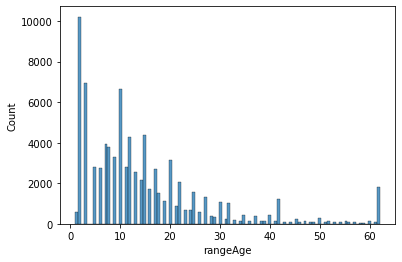

In [104]:
sns.histplot(mambadf['rangeAge'].loc[mambadf['rangeAge']!= 4])

In [105]:
age4 = mambadf.loc[mambadf['rangeAge'] == 4]
display(age4.describe())
age4.isna().mean()

,age,height,photocount,weight,id,count,rangeAge,percent,start_age
count,153850.000000,21212.000000,153850.000000,16296.000000,1.531180e+05,153850.0,153850.0,153850.000000,153850.000000
mean,31.340617,172.152461,0.279519,70.196613,1.795152e+09,1.0,4.0,0.000833,28.877309
std,6.821024,9.474125,0.884740,15.102538,3.587005e+06,0.0,0.0,0.000005,6.830993
min,18.000000,150.000000,0.000000,40.000000,1.790103e+09,1.0,4.0,0.000828,18.000000
25%,26.000000,165.000000,0.000000,60.000000,1.791378e+09,1.0,4.0,0.000828,23.000000
50%,31.000000,172.000000,0.000000,70.000000,1.795512e+09,1.0,4.0,0.000828,29.000000
75%,37.000000,179.000000,0.000000,80.000000,1.798167e+09,1.0,4.0,0.000839,34.000000
max,45.000000,220.000000,13.000000,160.000000,1.800291e+09,1.0,4.0,0.000839,72.000000


about                0.976341
age                  0.000000
aim                  0.556659
children             0.878044
city                 0.030751
edu                  0.882756
gender               0.000000
height               0.862125
intrestedin          0.000000
language             0.052753
live                 0.914488
partnerage           0.000000
photocount           0.000000
smoke                0.887813
weight               0.894079
id                   0.004758
count                0.000000
range_partner_age    0.000000
rangeAge             0.000000
simpleaim            0.000000
percent              0.000000
start_age            0.000000
dtype: float64

In [106]:
ageall = mambadf.loc[mambadf['rangeAge'] != 4]
display(ageall.describe())
ageall.isna().mean()

,age,height,photocount,weight,id,count,rangeAge,percent,start_age
count,86137.000000,49539.000000,86137.000000,35992.000000,8.566300e+04,86137.0,85403.000000,86137.000000,85403.000000
mean,29.494131,172.097156,0.894714,69.742804,1.795205e+09,1.0,14.652436,0.000834,24.674262
std,8.202573,9.146066,1.558115,15.583481,3.679133e+06,0.0,12.976517,0.000005,7.260410
min,18.000000,150.000000,0.000000,40.000000,1.790103e+09,1.0,1.000000,0.000828,18.000000
25%,21.000000,165.000000,0.000000,57.000000,1.791369e+09,1.0,6.000000,0.000828,18.000000
50%,30.000000,172.000000,0.000000,70.000000,1.795519e+09,1.0,11.000000,0.000839,23.000000
75%,36.000000,178.000000,1.000000,80.000000,1.798174e+09,1.0,19.000000,0.000839,30.000000
max,45.000000,220.000000,16.000000,160.000000,1.800291e+09,1.0,62.000000,0.000839,79.000000


about                0.850819
age                  0.000000
aim                  0.173073
children             0.523585
city                 0.024809
edu                  0.530213
gender               0.000000
height               0.424881
intrestedin          0.000000
language             0.030254
live                 0.644032
partnerage           0.008521
photocount           0.000000
smoke                0.548893
weight               0.582154
id                   0.005503
count                0.000000
range_partner_age    0.000000
rangeAge             0.008521
simpleaim            0.000000
percent              0.000000
start_age            0.008521
dtype: float64

### Отличаются ли группы тех, у кого диапазон возраста партнера 4 и все остальные?
По базовым статистикам разницы почти нет. 
* НО у НЕ4 больше стандартное отклонение в возрасте - у них больший диапазон, похоже. И больше ст.отклонение в начальном возрасте партнера. 
* НО очень интересно, что люди НЕ4, <b> намного лучше заполяют профиль </b>, в их группе меньший процент нулевых значений.

In [107]:
mambadf['y4n'] = 'Not 4' 
mambadf.loc[mambadf['rangeAge'] == 4, 'y4n'] = 'Yes 4'

In [108]:
mambadf['y4n'].value_counts()


Yes 4    153850
Not 4     86137
Name: y4n, dtype: int64

In [109]:
import random
yes = mambadf.loc[mambadf['y4n'] == 'Yes 4']
no = mambadf.loc[mambadf['y4n'] == 'Not 4']
yesLess = random.sample(list(yes.index), 96000)
yes_chosen = yes.loc[yes.index.isin(yesLess)]

mamba4 = pd.concat([yes_chosen, no])
mamba4['y4n'].value_counts()

Yes 4    96000
Not 4    86137
Name: y4n, dtype: int64

In [110]:
# тут я сделала дф, где посчитала в процентах и счет кол-во людей по уровням образования в двух группах 4 и не4
edu_y4n = mamba4.loc[mamba4['edu'].isna() == False].groupby(['y4n', 'edu'])['count'].sum().reset_index()
edu_y4n['percent'] = edu_y4n['count'] / edu_y4n.groupby('y4n')['count'].transform('sum')
edu_y4n

,y4n,edu,count,percent
0,Not 4,Высшее,19180,0.473978
1,Not 4,Два или более высших,2735,0.067588
2,Not 4,Среднее,14212,0.351208
3,Not 4,Учусь,4339,0.107226
4,Yes 4,Высшее,4594,0.407414
5,Yes 4,Два или более высших,576,0.051082
6,Yes 4,Среднее,5349,0.474370
7,Yes 4,Учусь,757,0.067134


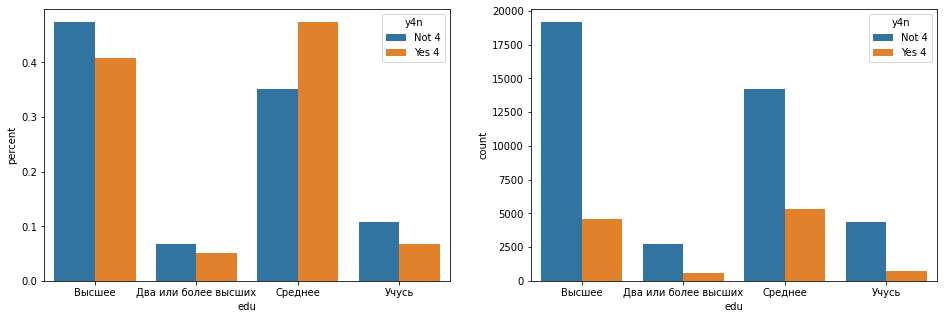

In [111]:
fig, axs = plt.subplots(figsize = (16, 5), ncols = 2, nrows = 1)
sns.barplot(data = edu_y4n, x='edu', y='percent', hue='y4n', ax=axs[0])
sns.barplot(data = edu_y4n, x='edu', y='count', hue='y4n', ax=axs[1])
fig.savefig('edu.png')

### Далее применила хи-тест, чтобы понять, значимы ли статистически различия в образовании 
между теми, кто указывает 4 как диапазон возраста, и теми, кто не указывает
<br> https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/ 
<br> https://lit-review.ru/biostatistika/kriterijj-khi-kvadrat-pirsona/
#### Но может тут хи и не нужен, 
а можно просто сравнить погруппно: у кого есть вышка и у кого нет... но группы очень разные. 

In [39]:
edus = ageall.groupby('edu')['count'].count().reset_index()
edus = edus.rename(columns={'count' : 'nfour'})
edus = edus.merge(age4.groupby('edu')['count'].count().reset_index(), on='edu')
edus = edus.rename(columns={'count' : 'four'})
edus = pd.pivot_table(edus, columns='edu', values=['nfour', 'four']).reset_index()
edus

edu,index,Высшее,Два или более высших,Среднее,Учусь
0,four,7312,891,8626,1209
1,nfour,19180,2735,14212,4339


In [40]:
dicttot = {}
for col, tot in zip(list(edus.columns), list(edus.sum(axis=0))):
    dicttot[col] = tot
    
edus = edus.append(dicttot, ignore_index=True)
edus['total'] = edus.sum(axis = 1)
edus

,index,Высшее,Два или более высших,Среднее,Учусь,total
0,four,7312,891,8626,1209,18038
1,nfour,19180,2735,14212,4339,40466
2,fournfour,26492,3626,22838,5548,58504


In [41]:
edus['total'][0:2]

0    18038
1    40466
Name: total, dtype: int64

In [42]:
expected_values = np.outer(edus['total'][0:2], edus.loc[edus['index'] == 'fournfour', ['Высшее', 'Два или более высших', 'Среднее', 'Учусь']])/58504
expected_values

array([[ 8168.03459593,  1117.97121564,  7041.43039792,  1710.56379051],
       [18323.96540407,  2508.02878436, 15796.56960208,  3837.43620949]])

In [43]:
observed = edus.iloc[0:2, 1:5]

In [44]:
((observed-expected_values)**2/expected_values).sum().sum()

924.4820765918109

### Теперь буду смотреть, чем еще могут различаться группы людей с диапазоном возраста партнера 4 и не 4
Распределение мужчин и женщин в этих группах НЕ отличается, как показал хи-тест.


In [45]:
age4gens = age4.gender.value_counts()
ageallgens = ageall.gender.value_counts()
display(age4gens)
ageallgens

Мужчины    79386
Женщины    74464
Name: gender, dtype: int64

Женщины    44758
Мужчины    41379
Name: gender, dtype: int64

In [46]:
chiGender = pd.DataFrame(index=['four', 'notfour', 'total'], data = {'Мужчины': [age4gens[0], ageallgens[0], age4gens[0]+ageallgens[0]], 
                                                            'Женщины': [age4gens[1], ageallgens[1], age4gens[1]+ageallgens[1]]})

chiGender['Total'] = chiGender.sum(axis = 1)
display(chiGender)

expected = np.outer(chiGender['Total'][0:2], chiGender.loc['total', ['Мужчины', 'Женщины']])/239987
display(expected)

import scipy.stats as stats
expected = pd.DataFrame(expected)
observed = chiGender.iloc[0:2, 0:2]

stats.chisquare(observed.values, expected.values, axis=None)

,Мужчины,Женщины,Total
four,79386,74464,153850
notfour,44758,41379,86137
total,124144,115843,239987


array([[79585.78756349, 74264.21243651],
       [44558.21243651, 41578.78756349]])

Power_divergenceResult(statistic=2.8947914303114195, pvalue=0.4081323182597216)

#### Посмотрю на языковые различия 
* сделала функцию, которая считает процент от группы, который говорит на тот или ином языке 
* у меня по-прежнему 2 группы: 4 и не 4 диапазон возраста. 
<br> <b> Получилось, что те, кто в группе "Не4" больше говорят по-русски, меньше по-английски, французски и испански </b>

In [47]:
oneperc = 100/mamba4.loc[mamba4['language'].isna() == False].shape[0]

def count_langs(language_col, oneperc): 
    dictlang = {}
    for lang in language_col:
        try: 
            lst =lang.split(', ')
            for item in lst:
                if item not in dictlang.keys():
                    dictlang[item]=oneperc
                else: 
                    dictlang[item]+=oneperc
        except: 
            continue 
    return dictlang


In [48]:
onepercall = 100/ageall.loc[ageall['language'].isna() == False].shape[0]
oneperc4all = 100/age4.loc[age4['language'].isna() == False].shape[0]

In [49]:
languages = pd.DataFrame(data={'langs' : count_langs(list(ageall.language), onepercall).keys(), 
                               'not4': count_langs(list(ageall.language), onepercall).values()})
languages2 = pd.DataFrame(data={'langs' : count_langs(list(age4.language), oneperc4all).keys(), 
                               'is4': count_langs(list(age4.language), oneperc4all).values()})
alllangs = languages.merge(languages2, how='outer')
alllangs.fillna(0, inplace=True)
alllangs.head()

,langs,not4,is4
0,Русский,88.392333,81.669343
1,Укра,0.413020,0.096065
2,English,10.288396,12.839145
3,Polski,0.413020,0.444646
4,Fran,0.767380,1.473232


In [50]:
alllangs['not4-is4'] = alllangs['not4'] - alllangs['is4']
alllangs

,langs,not4,is4,not4-is4
0,Русский,88.392333,81.669343,6.722991
1,Укра,0.413020,0.096065,0.316955
2,English,10.288396,12.839145,-2.550749
3,Polski,0.413020,0.444646,-0.031625
4,Fran,0.767380,1.473232,-0.705852
5,Deutsch,2.055524,0.748624,1.306900
6,Espa,1.245047,1.775152,-0.530105
7,Rom,0.114927,0.205855,-0.090927
8,Afrikaans,0.009577,0.000686,0.008891
9,Italiano,0.280136,0.287510,-0.007375


### Теперь посмотрю на различия в возрасте 
Они явно есть. Кажется, что распределения по возрастам похожи, но отличие в том, что у НЕ4 очень много значений до 20, а у ДА4 - около 22 и 32 лет небольшие пики. Это интересно, потомму что НЕ4 отличаются более высоким уровнем образования... Дело в том, что 75% людей до 20 лет в группе НЕ4 образование просто не указывают. А после 20 лет в группе НЕ4 не указывают 45%.

Yes 4    96000
Not 4    86137
Name: y4n, dtype: int64

31.0

30.0

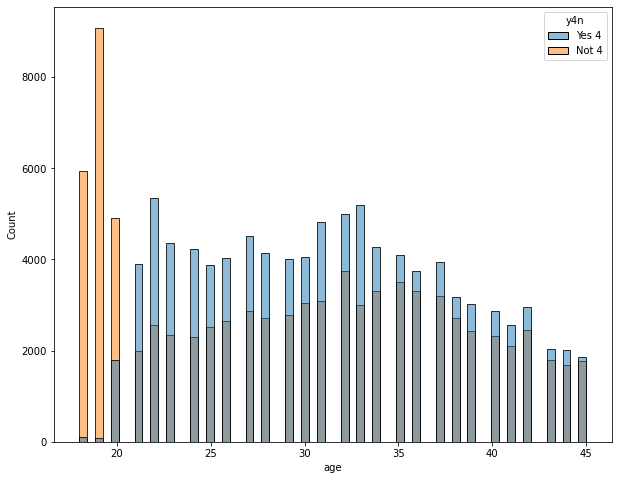

In [113]:
display(mamba4.y4n.value_counts())
display(mamba4.loc[mamba4['y4n'] == 'Yes 4', 'age'].median())
display(mamba4.loc[mamba4['y4n'] == 'Not 4', 'age'].median())
fig, axs = plt.subplots(figsize = (10, 8))
sns.histplot(data = mamba4, x='age', hue='y4n')
fig.savefig('ages.png')

In [52]:
import scipy.stats
from scipy.stats import mannwhitneyu
mannwhitneyu(mambadf.loc[mambadf['y4n'] == 'Yes 4', 'age'], mambadf.loc[mambadf['y4n'] == 'Not 4', 'age'])

MannwhitneyuResult(statistic=7572119934.0, pvalue=0.0)

In [53]:
from scipy.stats import ttest_ind
ttest_ind(mamba4.loc[mambadf['y4n'] == 'Yes 4', 'age'], mamba4.loc[mamba4['y4n'] == 'Not 4', 'age'])

Ttest_indResult(statistic=52.02103032190268, pvalue=0.0)

#### Дальше смотрю, а указывают ли 20-летки свое образование в группе НЕ4? 

In [55]:
ageeduN4 = mamba4.loc[mamba4['y4n'] == 'Not 4', ['age', 'edu']]
display(ageeduN4[ageeduN4['age'] <= 20]['edu'].shape)
ageeduN4[ageeduN4['age'] <= 20]['edu'].isna().sum()/19936

(19936,)

0.752207062600321

In [58]:
ageedu4 = mamba4.loc[mamba4['y4n'] == 'Not 4', ['age', 'edu']]
display(ageedu4[ageedu4['age'] > 20]['edu'].shape)
ageedu4[ageedu4['age'] > 20]['edu'].isna().sum()/66201

(66201,)

0.4633615806407758

### Есть ли разница в цели на сайте у групп ДА4 и НЕ4? 
есть. Те, кто НЕ4 не уверены в своих целях (33%), при этом у другой группы 55% вообще не указывают цель, но и очень мало (6%) указывают больше трех целей. Количество людей, ищущих отношения или флирт одинаковое в двух группах. У НЕ4 в три раза больше семьянинов и в 4 раза больше дружелюбных. 

In [114]:
fouraim = mamba4.loc[mamba4['y4n'] == 'Yes 4', ['age', 'simpleaim']]
nfouraim = mamba4.loc[mamba4['y4n'] == 'Not 4', ['age', 'simpleaim']]
fouraim.head()

,age,simpleaim
1,36.0,unknown
4,44.0,casual
7,23.0,relationships
8,45.0,unsure
10,26.0,unknown


In [115]:
aims4 = pd.Series(fouraim['simpleaim'].value_counts()/fouraim.shape[0])[:7]*100
aimsall = pd.Series(nfouraim['simpleaim'].value_counts()/nfouraim.shape[0])[:7]*100
aims1 = pd.DataFrame(data={'y4n' : 'no4', 'percent' : aimsall.values, 'aims' : aimsall.index})
aims2 = pd.DataFrame(data={'y4n' : 'yes4', 'percent' : aims4.values, 'aims' : aims4.index})

In [116]:
all_aims = aims1.append(aims2)
fig = px.bar(all_aims, x="y4n", y="percent",
             color='aims', barmode='group', title='Distribution of aims among groups to chose 4years-range of partner and not'
             )
fig.show()

In [62]:
aims4c = pd.Series(fouraim['simpleaim'].value_counts()[:7])
aimsallc = pd.Series(nfouraim['simpleaim'].value_counts()[:7])
aims1c = pd.DataFrame(data={'y4n' : 'no4', 'percent' : aimsallc.values, 'aims' : aimsallc.index})
aims2c = pd.DataFrame(data={'y4n' : 'yes4', 'percent' : aims4c.values, 'aims' : aims4c.index})
aimsc = aims1c.append(aims2c)
aims_table = pd.pivot_table(data=aimsc, index='y4n', columns='aims', values='percent')
aims_table['total'] = aims_table.sum(axis=1)
aimst = aims_table.append(pd.DataFrame(aims_table.sum()).transpose())
aimst

aims,casual,family-person,friendy,relationships,unknown,unsure,занятия спортом,total
no4,20997,693,4637,16965,14908,26975,44,85219
yes4,18949,223,1245,16336,53671,5325,21,95770
0,39946,916,5882,33301,68579,32300,65,180989


In [63]:
expected = np.outer(aimst['total'][0:2], aimst.loc[0, ['casual', 'family-person', 'friendy', 'relationships', 
                                                         'unknown', 'unsure', 'занятия спортом']])/180989
display(expected)

expected = pd.DataFrame(expected)
observed = aimst.iloc[0:2, 0:7]

stats.chisquare(observed.values, expected.values, axis=None)

array([[1.88086468e+04, 4.31300267e+02, 2.76955040e+03, 1.56798364e+04,
        3.22905469e+04, 1.52085138e+04, 3.06053683e+01],
       [2.11373532e+04, 4.84699733e+02, 3.11244960e+03, 1.76211636e+04,
        3.62884531e+04, 1.70914862e+04, 3.43946317e+01]])

Power_divergenceResult(statistic=38258.78719201496, pvalue=0.0)

### Какие есть закономерности в группах по детям, месту жительства/, городу, курению? 

In [120]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats

mambadf = pd.read_csv('mamba18-45newColumns.csv')
mambadf.columns

Index(['about', 'age', 'aim', 'children', 'city', 'edu', 'gender', 'height',
       'intrestedin', 'language', 'live', 'partnerage', 'photocount', 'smoke',
       'weight', 'id', 'count', 'range_partner_age', 'rangeAge', 'simpleaim',
       'percent', 'start_age'],
      dtype='object')

In [122]:
mambadf.city.value_counts()[:30]

Москва             25214
Санкт-Петербург    10236
Самара              6290
Краснодар           5767
Новосибирск         5507
Екатеринбург        4432
Казань              4039
Челябинск           3158
Ростов-на-Дону      2944
Нижний Новгород     2898
Алматы              2648
Минск               2564
Конакри             2353
Лагос               2300
Ташкент             2264
Киев                2246
Воронеж             2157
Омск                1925
Стамбул             1537
Уфа                 1509
Пермь               1487
Нур-Султан          1477
Красноярск          1463
Хабаровск           1367
Волгоград           1325
Саратов             1321
Ставрополь          1285
Бурсоль             1178
Иркутск             1163
Баку                1153
Name: city, dtype: int64

#### О детях написали конкретно 25% людей. Какой у них возраст? Откуда они? Кто хочет детей?
* интересно, что мужчины больше хотят детей, чем женщины; мужчины чуть ли не в 4 раза больше женщин живут порознь со своими детьми, а женщины чуть ли не в 8 раза больше живут со своими детьми. Ну и логично: дети обычно остаются с мамой. 
* дети есть пишут, начиная, в среднем, от 35 лет (закономерно тоже)

In [4]:
display(mambadf.children.isna().mean())
mambadf.children.value_counts()[:4]

0.750819836074454

Детей нет                   32220
Дети есть, живем вместе     12884
Детей нет, но хочу           7557
Дети есть, живем порознь     7111
Name: children, dtype: int64

In [6]:
mambachil = mambadf.loc[mambadf['children'].isin(list(mambadf.children.value_counts()[:4].index))]
mambachil.groupby(['children', 'gender']).agg({'count':'sum', 'age':'mean'})

count        age
children                 gender                   
Детей нет                Женщины  14042  26.753454
                         Мужчины  18178  28.735890
Детей нет, но хочу       Женщины   3281  29.124962
                         Мужчины   4276  31.404818
Дети есть, живем вместе  Женщины  11346  35.056672
                         Мужчины   1538  37.173602
Дети есть, живем порознь Женщины   1580  38.390506
                         Мужчины   5531  37.756644

In [7]:
#похоже, работает закон больших чисел, можно даже не проводить хи-тест
mambachil.gender.value_counts()

Женщины    30249
Мужчины    29523
Name: gender, dtype: int64

#### о курении, как живут
* забавно, что те, кто живут с родителями, в большей части сами не знают, чего хотят, потом отношения идут. 
* те, у кого своя квартира

In [8]:
mambadf.smoke.value_counts()

Не курю    37369
Курю       18748
Name: smoke, dtype: int64

In [123]:
mambaLive = mambadf.loc[mambadf.simpleaim.isin(['casual', 'relationships', 'friendy', 'family-person', 'unsure', 'unknown'])]

In [124]:
edu_y4n['percent'] = edu_y4n['count'] / edu_y4n.groupby('y4n')['count'].transform('sum')

In [125]:
mambaLive['percent'] = mambaLive['count']/mambaLive.groupby(['live', 'gender'])['count'].transform('sum')
mambaLive.head()

<ipython-input-125-cfc420dda30a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,about,age,aim,children,city,edu,gender,height,intrestedin,language,...,photocount,smoke,weight,id,count,range_partner_age,rangeAge,simpleaim,percent,start_age
0,NaN,41.0,NaN,NaN,Старобельск,NaN,Женщины,165.0,парень,"Русский, Укра",...,0.0,Курю,65.0,NaN,1,"('25', '40')",15.0,unknown,NaN,25.0
1,NaN,36.0,NaN,NaN,Краснодар,NaN,Женщины,NaN,парень,Русский,...,0.0,NaN,NaN,NaN,1,"('33', '37')",4.0,unknown,NaN,33.0
2,"Не ищу приключений.\nНе ищу спонсоров, альфонс...",39.0,"переписка, флирт, дружба, общение, отношения, ...",Детей нет,Дюссельдорф,NaN,Женщины,167.0,парень,Deutsch,...,0.0,Не курю,NaN,NaN,1,"('36', '40')",4.0,unsure,0.000063,36.0
3,NaN,28.0,"брак, создание семьи, дружба, общение, отношения",NaN,Кременчуг,NaN,Женщины,163.0,парень,Русский,...,0.0,NaN,85.0,NaN,1,"('25', '31')",6.0,unsure,NaN,25.0
4,NaN,44.0,"встреча, свидание",NaN,Донецк,NaN,Женщины,NaN,парень,Русский,...,0.0,NaN,NaN,NaN,1,"('41', '45')",4.0,casual,NaN,41.0


#### Кто с кем живет и чего хочет? 
* в группе Живу с родителями отношений хотят поровну, мужчины больше хотят флирта-встречи и в большей степени не знают, чего хотят. 
* в группе Отдельная квартира женщины больше хотят отношений, мужчина больше хотят флирта, одинаково хотят семью. 

In [20]:
mambaLive.groupby(['live', 'gender', 'simpleaim']).agg({'percent':'sum', 'age':'mean'})

percent        age
live               gender  simpleaim                         
Живу с родителями  Женщины casual         0.177240  25.486072
                           family-person  0.025179  33.313725
                           friendy        0.117255  26.111579
                           relationships  0.288818  28.896581
                           unknown        0.012836  26.846154
                           unsure         0.378672  28.138853
                   Мужчины casual         0.249342  28.221636
                           family-person  0.016776  35.862745
                           friendy        0.042763  27.115385
                           relationships  0.276645  28.644471
                           unknown        0.013487  26.390244
                           unsure         0.400987  28.780968
Отдельная квартира Женщины casual         0.210075  29.167909
                           family-person  0.012906  34.854369
                           friendy        0.081511  31.204458
                           relationships  0.231878  33.375844
                           unknown        0.020112  31.302181
                           unsure         0.443519  32.306117
                   Мужчины casual         0.285300  31.952632
                           family-person  0.013264  34.905660
                           friendy        0.030132  31.480066
                           relationships  0.176035  33.129940
                           unknown        0.024175  31.834369
                           unsure         0.471095  33.162027

### Создаю числовые переменные для машинного обучения 

In [70]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

mambadf = pd.read_csv('mamba18-45newColumns.csv')
mambadf.columns

Index(['about', 'age', 'aim', 'children', 'city', 'edu', 'gender', 'height',
       'intrestedin', 'language', 'live', 'partnerage', 'photocount', 'smoke',
       'weight', 'id', 'count', 'range_partner_age', 'rangeAge', 'simpleaim',
       'percent', 'start_age'],
      dtype='object')

In [71]:
mambaml = mambadf[['about', 'age', 'simpleaim', 'children', 'edu', 'gender', 'intrestedin', 'language', 'live', 'rangeAge']]
mambaml.fillna(0, inplace=True)
mambaml.head()

C:\Users\okean\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,about,age,simpleaim,children,edu,gender,intrestedin,language,live,rangeAge
0,0,41.0,unknown,0,0,Женщины,парень,"Русский, Укра",0,15.0
1,0,36.0,unknown,0,0,Женщины,парень,Русский,0,4.0
2,"Не ищу приключений.\nНе ищу спонсоров, альфонс...",39.0,unsure,Детей нет,0,Женщины,парень,Deutsch,Отдельная квартира,4.0
3,0,28.0,unsure,0,0,Женщины,парень,Русский,0,6.0
4,0,44.0,casual,0,0,Женщины,парень,Русский,0,4.0


In [72]:
mambaml.loc[mambaml['about'] != 0, 'about'] = 1
mambaml.loc[mambaml['gender'] == 'Женщины', 'gender'] = 2
mambaml.loc[mambaml['gender'] != 2, 'gender'] = 1
mambaml.loc[mambaml['intrestedin'] == 'парень', 'intrestedin'] = 1
mambaml.loc[mambaml['intrestedin'] != 1, 'intrestedin'] = 2
mambaml.loc[mambaml['live'] == 'Отдельная квартира', 'live'] = 1
mambaml.loc[mambaml['live'] != 1, 'live'] = 2
mambaml.loc[mambaml['rangeAge'] != 4, 'rangeAge'] = 2
mambaml.loc[mambaml['rangeAge'] == 4, 'rangeAge'] = 1
mambaml.head()

C:\Users\okean\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\okean\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\okean\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,about,age,simpleaim,children,edu,gender,intrestedin,language,live,rangeAge
0,0,41.0,unknown,0,0,2,1,"Русский, Укра",2,2.0
1,0,36.0,unknown,0,0,2,1,Русский,2,1.0
2,1,39.0,unsure,Детей нет,0,2,1,Deutsch,1,1.0
3,0,28.0,unsure,0,0,2,1,Русский,2,2.0
4,0,44.0,casual,0,0,2,1,Русский,2,1.0


In [73]:
mambaml.head()

,about,age,simpleaim,children,edu,gender,intrestedin,language,live,rangeAge
0,0,41.0,unknown,0,0,2,1,"Русский, Укра",2,2.0
1,0,36.0,unknown,0,0,2,1,Русский,2,1.0
2,1,39.0,unsure,Детей нет,0,2,1,Deutsch,1,1.0
3,0,28.0,unsure,0,0,2,1,Русский,2,2.0
4,0,44.0,casual,0,0,2,1,Русский,2,1.0


In [74]:
def simpleAge(age): 
    if age <= 24:
        return 1
    elif age > 24 and age <= 31:
        return 2
    elif age > 31 and age <= 36:
        return 3
    elif age > 36 and age <= 45:
        return 4
    else:
        return age
    
ages = pd.Series(np.array(mambaml.age))
mambaml['simpleage'] = ages.apply(simpleAge)    
mambaml.head()

<ipython-input-74-07dda507f62c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mambaml['simpleage'] = ages.apply(simpleAge)


,about,age,simpleaim,children,edu,gender,intrestedin,language,live,rangeAge,simpleage
0,0,41.0,unknown,0,0,2,1,"Русский, Укра",2,2.0,4
1,0,36.0,unknown,0,0,2,1,Русский,2,1.0,3
2,1,39.0,unsure,Детей нет,0,2,1,Deutsch,1,1.0,4
3,0,28.0,unsure,0,0,2,1,Русский,2,2.0,2
4,0,44.0,casual,0,0,2,1,Русский,2,1.0,4


In [75]:
def numericAim(aim): 
    if aim == 'casual':
        return 1
    elif aim == 'relationships':
        return 2
    elif aim == 'family-person':
        return 3
    elif aim == 'friendy':
        return 4
    elif aim == 'unknown':
        return 0
    elif aim == 'unsure':
        return 5
    else:
        return 1
    
aims = pd.Series(np.array(mambaml.simpleaim))
mambaml['numaim'] = aims.apply(numericAim)    
mambaml.head()

<ipython-input-75-dc70fcbf06e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mambaml['numaim'] = aims.apply(numericAim)


,about,age,simpleaim,children,edu,gender,intrestedin,language,live,rangeAge,simpleage,numaim
0,0,41.0,unknown,0,0,2,1,"Русский, Укра",2,2.0,4,0
1,0,36.0,unknown,0,0,2,1,Русский,2,1.0,3,0
2,1,39.0,unsure,Детей нет,0,2,1,Deutsch,1,1.0,4,5
3,0,28.0,unsure,0,0,2,1,Русский,2,2.0,2,5
4,0,44.0,casual,0,0,2,1,Русский,2,1.0,4,1


In [76]:
def numericChil(chil): 
    if chil == 'Детей нет':
        return 1
    elif chil == 'Детей нет, но хочу':
        return 2
    elif chil == 'Дети есть, живем вместе':
        return 3
    elif chil == 'Дети есть, живем порознь':
        return 4
    else:
        return 0
    
chil = pd.Series(np.array(mambaml.children))
mambaml['numchildren'] = chil.apply(numericChil)    
mambaml.head()

<ipython-input-76-95873144d984>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mambaml['numchildren'] = chil.apply(numericChil)


,about,age,simpleaim,children,edu,gender,intrestedin,language,live,rangeAge,simpleage,numaim,numchildren
0,0,41.0,unknown,0,0,2,1,"Русский, Укра",2,2.0,4,0,0
1,0,36.0,unknown,0,0,2,1,Русский,2,1.0,3,0,0
2,1,39.0,unsure,Детей нет,0,2,1,Deutsch,1,1.0,4,5,1
3,0,28.0,unsure,0,0,2,1,Русский,2,2.0,2,5,0
4,0,44.0,casual,0,0,2,1,Русский,2,1.0,4,1,0


In [77]:
def numericEdu(Edu): 
    if Edu == 'Два или более высших':
        return 1
    elif Edu == 'Высшее':
        return 2
    elif Edu == 'Среднее':
        return 3
    elif Edu == 'Учусь':
        return 4
    else:
        return 0
    
Edu = pd.Series(np.array(mambaml.edu))
mambaml['numEdu'] = Edu.apply(numericEdu)    
mambaml.head()

<ipython-input-77-a621cf62d342>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mambaml['numEdu'] = Edu.apply(numericEdu)


,about,age,simpleaim,children,edu,gender,intrestedin,language,live,rangeAge,simpleage,numaim,numchildren,numEdu
0,0,41.0,unknown,0,0,2,1,"Русский, Укра",2,2.0,4,0,0,0
1,0,36.0,unknown,0,0,2,1,Русский,2,1.0,3,0,0,0
2,1,39.0,unsure,Детей нет,0,2,1,Deutsch,1,1.0,4,5,1,0
3,0,28.0,unsure,0,0,2,1,Русский,2,2.0,2,5,0,0
4,0,44.0,casual,0,0,2,1,Русский,2,1.0,4,1,0,0


In [78]:
def numericLang(lang): 
    try:
        if 'Русский' in lang:
            return 2
        elif 'English' in lang:
            return 1
        else:
            return 0
    except:
        return 0
    
langs = pd.Series(np.array(mambaml.language))
mambaml['numLang'] = langs.apply(numericLang)    
mambaml.head()

<ipython-input-78-a381deb4917b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mambaml['numLang'] = langs.apply(numericLang)


,about,age,simpleaim,children,edu,gender,intrestedin,language,live,rangeAge,simpleage,numaim,numchildren,numEdu,numLang
0,0,41.0,unknown,0,0,2,1,"Русский, Укра",2,2.0,4,0,0,0,2
1,0,36.0,unknown,0,0,2,1,Русский,2,1.0,3,0,0,0,2
2,1,39.0,unsure,Детей нет,0,2,1,Deutsch,1,1.0,4,5,1,0,0
3,0,28.0,unsure,0,0,2,1,Русский,2,2.0,2,5,0,0,2
4,0,44.0,casual,0,0,2,1,Русский,2,1.0,4,1,0,0,2


In [79]:
mambaml.columns

Index(['about', 'age', 'simpleaim', 'children', 'edu', 'gender', 'intrestedin',
       'language', 'live', 'rangeAge', 'simpleage', 'numaim', 'numchildren',
       'numEdu', 'numLang'],
      dtype='object')

In [118]:
mldf = mambaml[['about', 'gender', 'live', 'rangeAge', 'numaim', 'numchildren', 'numEdu']]
mldf.head()

,about,gender,live,rangeAge,numaim,numchildren,numEdu
0,0,2,2,2.0,0,0,0
1,0,2,2,1.0,0,0,0
2,1,2,1,1.0,5,1,0
3,0,2,2,2.0,5,0,0
4,0,2,2,1.0,1,0,0


In [119]:
mldf['rangeAge'] = mldf.rangeAge.astype(int)
mldf.head()

<ipython-input-119-3775d1a0f1b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mldf['rangeAge'] = mldf.rangeAge.astype(int)


,about,gender,live,rangeAge,numaim,numchildren,numEdu
0,0,2,2,2,0,0,0
1,0,2,2,1,0,0,0
2,1,2,1,1,5,1,0
3,0,2,2,2,5,0,0
4,0,2,2,1,1,0,0


In [126]:
mldf.to_csv('mambaml.csv', index=False)

### Алгоритм классификации

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

df = pd.read_csv('mambaml.csv')

In [2]:
features = df[df.columns]
features

,about,gender,live,rangeAge,numaim,numchildren,numEdu
0,0,2,2,2,0,0,0
1,0,2,2,1,0,0,0
2,1,2,1,1,5,1,0
3,0,2,2,2,5,0,0
4,0,2,2,1,1,0,0
...,...,...,...,...,...,...,...
239982,0,1,2,1,0,0,0
239983,0,1,2,2,5,1,2
239984,0,1,2,1,0,0,0
239985,0,1,2,1,1,0,0


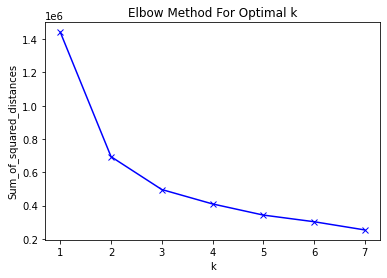

In [129]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()   

In [3]:
K_model = KMeans(4).fit(features)
df['cluster4'] = K_model.fit_predict(features)

In [4]:
dict_clust = {'cluster' : [], 'feature' : [], 'valuesCount' : [], 'featureValue' : []}
for clust in df.cluster4.unique():
    print('this is cluster ' +str(clust))
    dfclut = df.loc[df['cluster4'] == clust]
    display(dfclut.head())
    for feat in dfclut.columns[:-1]:
        for _ in dfclut[feat].value_counts().index:
            dict_clust['cluster'].append(clust)
            dict_clust['feature'].append(feat)

            dict_clust['featureValue'].append(_)
            dict_clust['valuesCount'].append(dfclut[feat].value_counts()[_])
        

this is cluster 0


,about,gender,live,rangeAge,numaim,numchildren,numEdu,cluster4
0,0,2,2,2,0,0,0,0
1,0,2,2,1,0,0,0,0
10,0,2,2,1,0,0,0,0
11,0,2,2,2,0,0,0,0
14,0,2,2,1,0,0,0,0


this is cluster 1


,about,gender,live,rangeAge,numaim,numchildren,numEdu,cluster4
2,1,2,1,1,5,1,0,1
3,0,2,2,2,5,0,0,1
5,1,2,2,2,4,3,3,1
6,0,2,1,1,4,3,3,1
8,0,2,2,1,5,3,2,1


this is cluster 2


,about,gender,live,rangeAge,numaim,numchildren,numEdu,cluster4
4,0,2,2,1,1,0,0,2
61,0,2,2,2,2,0,0,2
67,0,2,2,1,2,0,0,2
121,0,2,1,2,2,1,0,2
128,0,2,2,1,2,0,0,2


this is cluster 3


,about,gender,live,rangeAge,numaim,numchildren,numEdu,cluster4
7,0,2,1,1,2,1,2,3
9,1,2,1,2,1,1,2,3
57,0,2,2,2,1,0,2,3
59,0,2,1,2,2,3,2,3
70,0,2,1,2,3,3,2,3


In [8]:
dfResClusts = pd.DataFrame.from_dict(dict_clust)
dfResClusts.head()

,cluster,feature,valuesCount,featureValue
0,0,about,98637,0
1,0,about,623,1
2,0,gender,53106,2
3,0,gender,46154,1
4,0,live,99029,2


In [34]:
import plotly.express as px
df = dfResClusts
fig = px.bar(df, x="featureValue", y="valuesCount",
             facet_col="feature", facet_row='cluster')
fig.show()


#### Кластер 0 
Похоже, там много людей, которые ничего о себе не указали, кроме пола, которые живут с родителями и указали 4 года в диапазоне возраста партнера. 
#### Кластер 1
Отличительная черта - у них нет детей (самая многочисленная группа по 4-ем кластерам). Также в эту группу, похоже, вошли все, кто сам не знает, чего хочет от сайта, и кто хочет дружить. Больше всего людей среди других кластеров там о себе что-то написали. Разные уровни образования.
#### Кластер 2
Очень похожий на другие кластер, очень отличительно, что живут с родителями и при этом больше остальных кластеров хотят в равных долях флиртовать и отношений. У них нет детей. 
#### Кластер 3
Очень средний кластер, похож на кластер 1, возможно, их следовало в одну группу.


### Попробую 3 кластер

In [38]:
df1 = pd.read_csv('mambaml.csv')
features = df1[df1.columns]
K_model3 = KMeans(3).fit(features)
df1['cluster3'] = K_model3.fit_predict(features)

In [41]:
dict_clust = {'cluster' : [], 'feature' : [], 'valuesCount' : [], 'featureValue' : []}
for clust in df1.cluster3.unique():
    dfclut = df1.loc[df1['cluster3'] == clust]
    for feat in dfclut.columns[:-1]:
        for _ in dfclut[feat].value_counts().index:
            dict_clust['cluster'].append(clust)
            dict_clust['feature'].append(feat)

            dict_clust['featureValue'].append(_)
            dict_clust['valuesCount'].append(dfclut[feat].value_counts()[_])

In [42]:
dfRes = pd.DataFrame.from_dict(dict_clust)
dfRes.head()

,cluster,feature,valuesCount,featureValue
0,1,about,163102,0
1,1,about,2845,1
2,1,gender,84023,1
3,1,gender,81924,2
4,1,live,163020,2


In [43]:
import plotly.express as px
df = dfRes
fig = px.bar(df, x="featureValue", y="valuesCount",
             facet_col="feature", facet_row='cluster')
fig.show()

#### Кластер 0 
Похоже, там много людей, которые ничего о себе не указали, кроме пола, из тех целей, которые указали - флрит и отношения, которые живут с родителями и указали 4 года в диапазоне возраста партнера. 
#### Кластер 1 и 2 похожи
Отличительная черта - у них нет детей (самая многочисленная группа по 4-ем кластерам). Разные уровни образования. Больше живут отдельно от родителей. Отличаются целями: кластер 1 - не знаю и дружить, кластер 2 - флирт и отношения. 

